In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
ds = pd.read_csv('mushrooms.csv')
dat = ds.values

print(dat.shape)

headers = list(ds.columns.values) #store features of mushrooms

(8124, 23)


In [3]:
#Data Preprocessing
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))
    
data = dataa.T

cate = data[:, 0] #One hot encoding for NN implementation

print(data.shape)

(8124, 23)


In [4]:
split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6499, 22) (6499,)
(1625, 22) (1625,)


<h3> Decision Tree Implementation </h3>

In [5]:
acc = []
ans = []

for ix in range(10):
    dt = DTC()
    
    start = datetime.datetime.now()
    dt.fit(x_train, y_train)
    end = datetime.datetime.now()

    start = datetime.datetime.now()
    score = dt.score(x_test, y_test)
    end = datetime.datetime.now()

    print("Accurcy : ", score*100)
    acc.append(score*100)
    tem = dt.feature_importances_
    ans.append(tem)

Accurcy :  96.0615384615
Accurcy :  96.5538461538
Accurcy :  99.5076923077
Accurcy :  99.0153846154
Accurcy :  99.0153846154
Accurcy :  96.5538461538
Accurcy :  96.0615384615
Accurcy :  96.0615384615
Accurcy :  96.5538461538
Accurcy :  99.5076923077


Features most indicative of a poisonous mushroom wrt Decision Tree Model :  spore-print-color


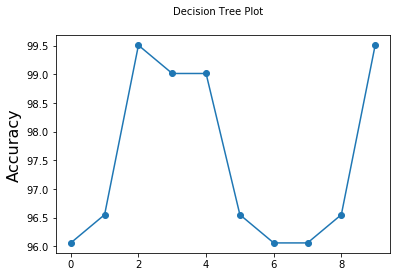

In [6]:
temp = [] 
for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))
    
mode = max(set(temp), key=temp.count) #find mode for features importance in decision trees
print("Features most indicative of a poisonous mushroom wrt Decision Tree Model : ", headers[mode+1])

plt.figure(0)
plt.suptitle('Decision Tree Plot', fontsize=10)
plt.plot(acc, '-o')
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Random Forest Implementation </h3>

In [7]:
est = [] #taking variable estimators
acc = []
ans = []
for iy in range(2, 200, 20):
    est.append(iy)

for ix in range(len(est)):
    rf = RFC(n_estimators=est[ix], n_jobs=2)
    #print("No. of Decision Trees : ", est[ix])
    
    start = datetime.datetime.now()
    rf.fit(x_train, y_train)
    end = datetime.datetime.now()

    start = datetime.datetime.now()
    score = rf.score(x_test, y_test)
    end = datetime.datetime.now()

    print("Accurcy : ", score*100)
    acc.append(score*100)
    tem = rf.feature_importances_
    ans.append(tem)

Accurcy :  98.5846153846
Accurcy :  99.4461538462
Accurcy :  99.3846153846
Accurcy :  98.9538461538
Accurcy :  98.5230769231
Accurcy :  99.3846153846
Accurcy :  99.3230769231
Accurcy :  98.6461538462
Accurcy :  99.4461538462
Accurcy :  99.5076923077


Features most indicative of a poisonous mushroom wrt Random Forest Model :  odor


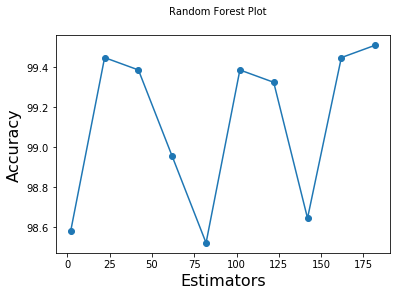

In [8]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print("Features most indicative of a poisonous mushroom wrt Random Forest Model : ", headers[mode+1])

plt.figure(1)
plt.suptitle('Random Forest Plot', fontsize=10)
plt.plot(est, acc, '-o')
plt.xlabel('Estimators', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Logistic Regression Implementation </h3>

In [9]:
lr = LR()

start = datetime.datetime.now()
lr.fit(x_train, y_train)
end = datetime.datetime.now()

print("Training Time : ", end-start)

start = datetime.datetime.now()
score = lr.score(x_test, y_test)
end = datetime.datetime.now()

print("Testing Time : ", end-start)

print("Accurcy : ", score*100 )

features = dt.feature_importances_

Training Time :  0:00:00.119290
Testing Time :  0:00:00.007422
Accurcy :  89.4153846154


In [10]:
temp = np.argmax(features)

print("Features most indicative of a poisonous mushroom wrt Logistic Regression Model : ", headers[temp+1])

Features most indicative of a poisonous mushroom wrt Logistic Regression Model :  spore-print-color


<h3> kNN Implementation </h3>

In [11]:
acc = []
ans = []
neighbours = []

for ix in range(3, 200, 20):
    neighbours.append(ix)

for ix in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[ix], n_jobs=-1)
    
    start = datetime.datetime.now()
    knn.fit(x_train, y_train)
    end = datetime.datetime.now()

    start = datetime.datetime.now()
    score = knn.score(x_test, y_test)
    end = datetime.datetime.now()

    print("Accurcy : ", score*100)
    acc.append(score*100)
    temp = dt.feature_importances_
    ans.append(temp)

Accurcy :  92.0615384615
Accurcy :  84.4307692308
Accurcy :  87.6923076923
Accurcy :  89.5384615385
Accurcy :  90.7692307692
Accurcy :  91.8769230769
Accurcy :  93.8461538462
Accurcy :  94.0307692308
Accurcy :  94.3384615385
Accurcy :  94.2769230769


Features most indicative of a poisonous mushroom wrt kNN :  spore-print-color


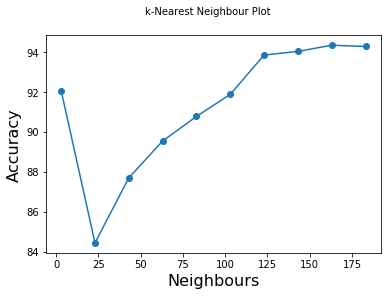

In [12]:
temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print("Features most indicative of a poisonous mushroom wrt kNN : ", headers[mode+1])

plt.figure(2)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(neighbours, acc, '-o')
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

<h3> Neural Network Implementation Using Keras </h3> 

In [13]:
y = np_utils.to_categorical(cate)
Y_train = y[:split]
Y_test = y[split:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(data.shape)

(6499, 22) (1625, 22)
(6499,) (1625,)
(8124, 23)


In [14]:
model = Sequential()

model.add(Dense(11, input_shape=(22,)))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 11)                253       
_________________________________________________________________
activation_1 (Activation)    (None, 11)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 60        
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [15]:
hist = model.fit(x_train, Y_train,
         epochs=70,
         shuffle=True,
         batch_size=128,
         validation_data=(x_test, Y_test))

Train on 6499 samples, validate on 1625 samples
Epoch 1/70
6499/6499 [==============================] - 0s - loss: 0.5951 - acc: 0.6836 - val_loss: 0.2705 - val_acc: 0.9311
Epoch 2/70
6499/6499 [==============================] - 0s - loss: 0.4715 - acc: 0.7910 - val_loss: 0.2278 - val_acc: 0.9354
Epoch 3/70
6499/6499 [==============================] - 0s - loss: 0.4160 - acc: 0.8192 - val_loss: 0.2237 - val_acc: 0.9409
Epoch 4/70
6499/6499 [==============================] - 0s - loss: 0.3649 - acc: 0.8520 - val_loss: 0.2318 - val_acc: 0.9582
Epoch 5/70
6499/6499 [==============================] - 0s - loss: 0.3268 - acc: 0.8746 - val_loss: 0.2244 - val_acc: 0.9520
Epoch 6/70
6499/6499 [==============================] - 0s - loss: 0.3008 - acc: 0.8860 - val_loss: 0.2339 - val_acc: 0.9502
Epoch 7/70
6499/6499 [==============================] - 0s - loss: 0.2791 - acc: 0.8928 - val_loss: 0.2469 - val_acc: 0.9342
Epoch 8/70
6499/6499 [==============================] - 0s - loss: 0.2548 - a

6499/6499 [==============================] - 0s - loss: 0.0043 - acc: 0.9997 - val_loss: 0.2415 - val_acc: 0.9366
Epoch 66/70
6499/6499 [==============================] - 0s - loss: 0.0043 - acc: 0.9997 - val_loss: 0.2155 - val_acc: 0.94400.9
Epoch 67/70
6499/6499 [==============================] - 0s - loss: 0.0038 - acc: 0.9997 - val_loss: 0.2451 - val_acc: 0.9348
Epoch 68/70
6499/6499 [==============================] - 0s - loss: 0.0035 - acc: 0.9995 - val_loss: 0.2000 - val_acc: 0.94890.
Epoch 69/70
6499/6499 [==============================] - 0s - loss: 0.0034 - acc: 0.9997 - val_loss: 0.2133 - val_acc: 0.9465
Epoch 70/70
6499/6499 [==============================] - 0s - loss: 0.0032 - acc: 0.9997 - val_loss: 0.2474 - val_acc: 0.9391


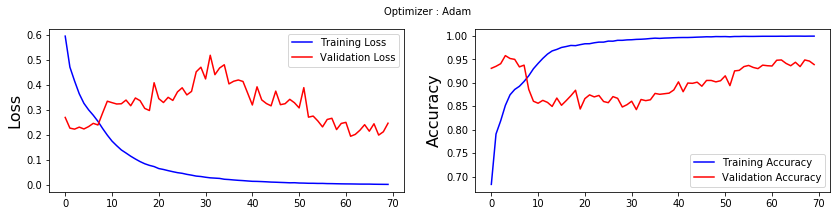

In [16]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()